# Energy Consumption Prediction

# Predicting energy budget of a building house for a month



* Weather data for 3 years
* Energy consumption record of 3 years
* Energy cost of a month


-------------------------------------------------

                                                       

* Columns Name
* Month (MM): Represents the month in numerical format.
* HH: Possibly represents the hour in a 24-hour format.
* TD: Could stand for Temperature Delta, which is the difference in temperature.
* U: Uncertain without additional context. It could refer to a variety of variables.
* Temp: Temperature.
* RH: Relative Humidity.
* Q: Quantity or flow rate, commonly used in fluid dynamics or heat transfer contexts.
* DR: Direction, potentially referring to wind or current direction.
* FF: Wind Force or Wind Speed.
* FX: Maximum Wind Gust.
* P: Pressure.

# import impotant librays

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 * Lode dataset

In [2]:
energy = pd.read_excel('Building energy consumption racord.xlsx')
energy

,Time,building 41
0,2016-01-01 01:00:00,23.783228
1,2016-01-01 02:00:00,23.783228
2,2016-01-01 03:00:00,23.783228
3,2016-01-01 04:00:00,23.783228
4,2016-01-01 05:00:00,23.783228
...,...,...
26298,2018-12-31 19:00:00,18.602723
26299,2018-12-31 20:00:00,18.838200
26300,2018-12-31 21:00:00,18.602723
26301,2018-12-31 22:00:00,18.131768


In [3]:
energy_x = energy.set_index('Time')

In [4]:
energy_x

,building 41
Time,
2016-01-01 01:00:00,23.783228
2016-01-01 02:00:00,23.783228
2016-01-01 03:00:00,23.783228
2016-01-01 04:00:00,23.783228
2016-01-01 05:00:00,23.783228
...,...
2018-12-31 19:00:00,18.602723
2018-12-31 20:00:00,18.838200
2018-12-31 21:00:00,18.602723


In [5]:
energy_x.shape

(26303, 1)

In [6]:
energy_x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26303 entries, 2016-01-01 01:00:00 to 2018-12-31 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   building 41  26303 non-null  float64
dtypes: float64(1)
memory usage: 411.0 KB


In [7]:
energy_x.isnull().sum()

building 41    0
dtype: int64

In [8]:
energy_x.duplicated()

Time
2016-01-01 01:00:00    False
2016-01-01 02:00:00     True
2016-01-01 03:00:00     True
2016-01-01 04:00:00     True
2016-01-01 05:00:00     True
                       ...  
2018-12-31 19:00:00     True
2018-12-31 20:00:00     True
2018-12-31 21:00:00     True
2018-12-31 22:00:00     True
2018-12-31 23:00:00     True
Length: 26303, dtype: bool

In [9]:
energy_x.describe()

,building 41
count,26303.000000
mean,25.694969
std,6.317738
min,15.541515
25%,20.957498
50%,23.783228
75%,28.728255
max,59.340330


# Explore and Analyze Data:

{'whiskers': [<matplotlib.lines.Line2D at 0x1af43125a80>,
 'caps': [<matplotlib.lines.Line2D at 0x1af43125fc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af431257e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1af43126500>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af431267a0>],
 'means': []}

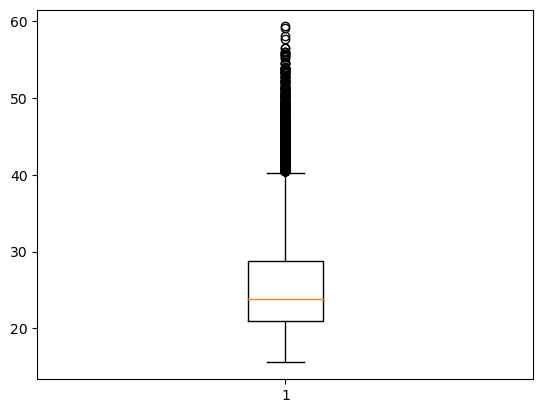

In [10]:
plt.boxplot(energy_x['building 41']) # Energy.loc[:,'building 12'] or Energy.iloc[:,0]

<Axes: >

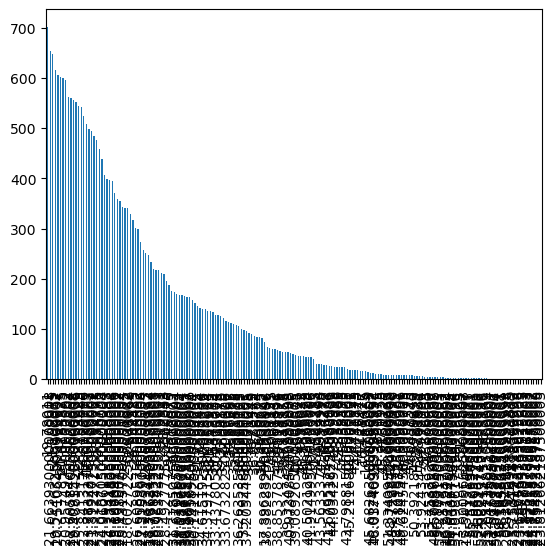

In [11]:
energy_x['building 41'].value_counts().plot(kind='bar')

<Axes: >

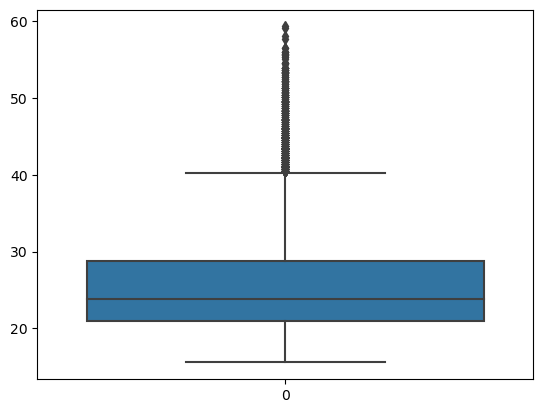

In [12]:
sns.boxplot(energy_x['building 41'])


* Columns Name Datails
* Month (MM): Represents the month in numerical format.
* HH: Possibly represents the hour in a 24-hour format.
* TD: Could stand for Temperature Delta, which is the difference in temperature.
* U: Uncertain without additional context. It could refer to a variety of variables.
* Temp: Temperature.
* RH: Relative Humidity.
* Q: Quantity or flow rate, commonly used in fluid dynamics or heat transfer contexts.
* DR: Direction, potentially referring to wind or current direction.
* FF: Wind Force or Wind Speed.
* FX: Maximum Wind Gust.
* P: Pressure.

In [13]:
energy1 = pd.read_excel('WeatherData.xlsx')

In [14]:
energy1

,Time,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
0,2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
1,2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2,2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
3,2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
4,2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...,...
26298,2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
26299,2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
26300,2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336
26301,2018-12-31 22:00:00,12,22,68,94,7.6,0.94,0,0,40,70,10332


In [15]:
energy1['Time'].value_counts()


2016-01-01 01:00:00    1
2017-12-31 12:00:00    1
2017-12-31 22:00:00    1
2017-12-31 21:00:00    1
2017-12-31 20:00:00    1
                      ..
2016-12-31 06:00:00    1
2016-12-31 05:00:00    1
2016-12-31 04:00:00    1
2016-12-31 03:00:00    1
2018-12-31 23:00:00    1
Name: Time, Length: 26303, dtype: int64

<Axes: >

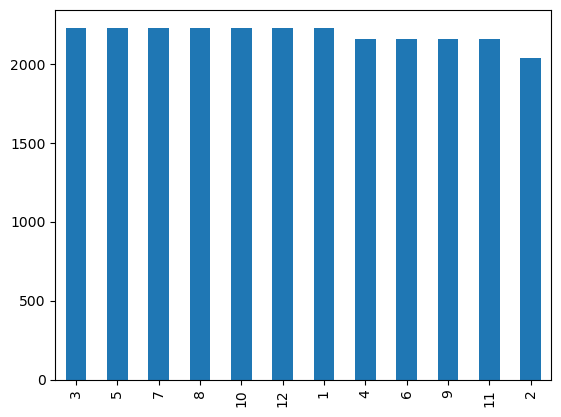

In [16]:
energy1['month'].value_counts().plot(kind='bar')


<Axes: >

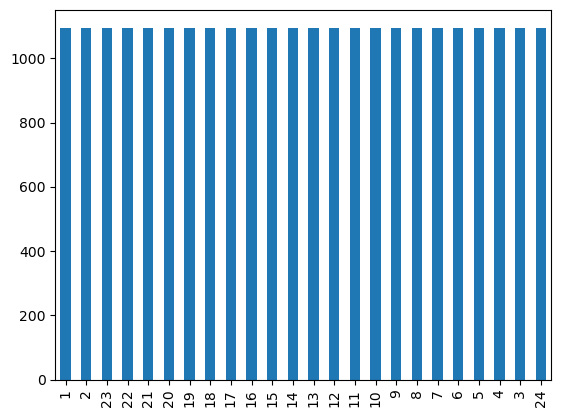

In [17]:
energy1['HH'].value_counts().plot(kind='bar')

<Axes: >

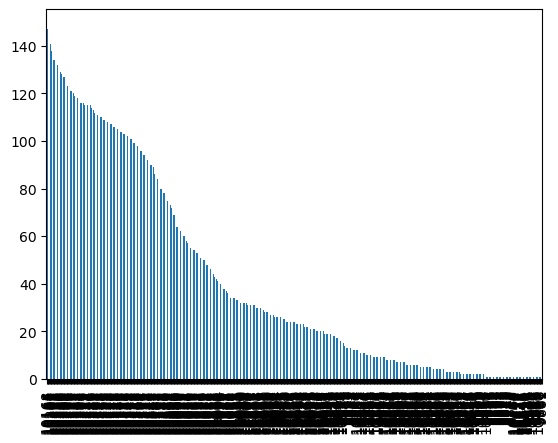

In [18]:
energy1['P'].value_counts().plot(kind='bar')

In [19]:
energy_y = energy1.set_index('Time')

In [20]:
energy_y

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336


In [21]:
#concatenating the datasets of weather data and electricity consumption

df = pd.concat([energy_x,energy_y],axis=1) #axis =1 for considering the columns

In [22]:
df

,building 41,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,,,
2016-01-01 01:00:00,23.783228,1,1,38,82,6.6,0.82,0,0,30,70,10224
2016-01-01 02:00:00,23.783228,1,2,43,83,7.0,0.83,0,0,40,80,10228
2016-01-01 03:00:00,23.783228,1,3,46,91,5.9,0.91,0,0,30,80,10232
2016-01-01 04:00:00,23.783228,1,4,36,96,4.2,0.96,0,0,20,40,10237
2016-01-01 05:00:00,23.783228,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,18.602723,12,19,78,93,8.7,0.93,0,0,30,60,10341
2018-12-31 20:00:00,18.838200,12,20,74,92,8.5,0.92,0,0,30,50,10338
2018-12-31 21:00:00,18.602723,12,21,66,89,8.2,0.89,0,0,40,60,10336


In [23]:
df.shape

(26303, 12)

In [24]:
# Handeling mishing value
df.isnull().sum()

building 41    0
month          0
HH             0
TD             0
U              0
Temp           0
RH             0
Q              0
DR             0
FF             0
FX             0
P              0
dtype: int64

In [25]:
import missingno as msno

<Axes: >

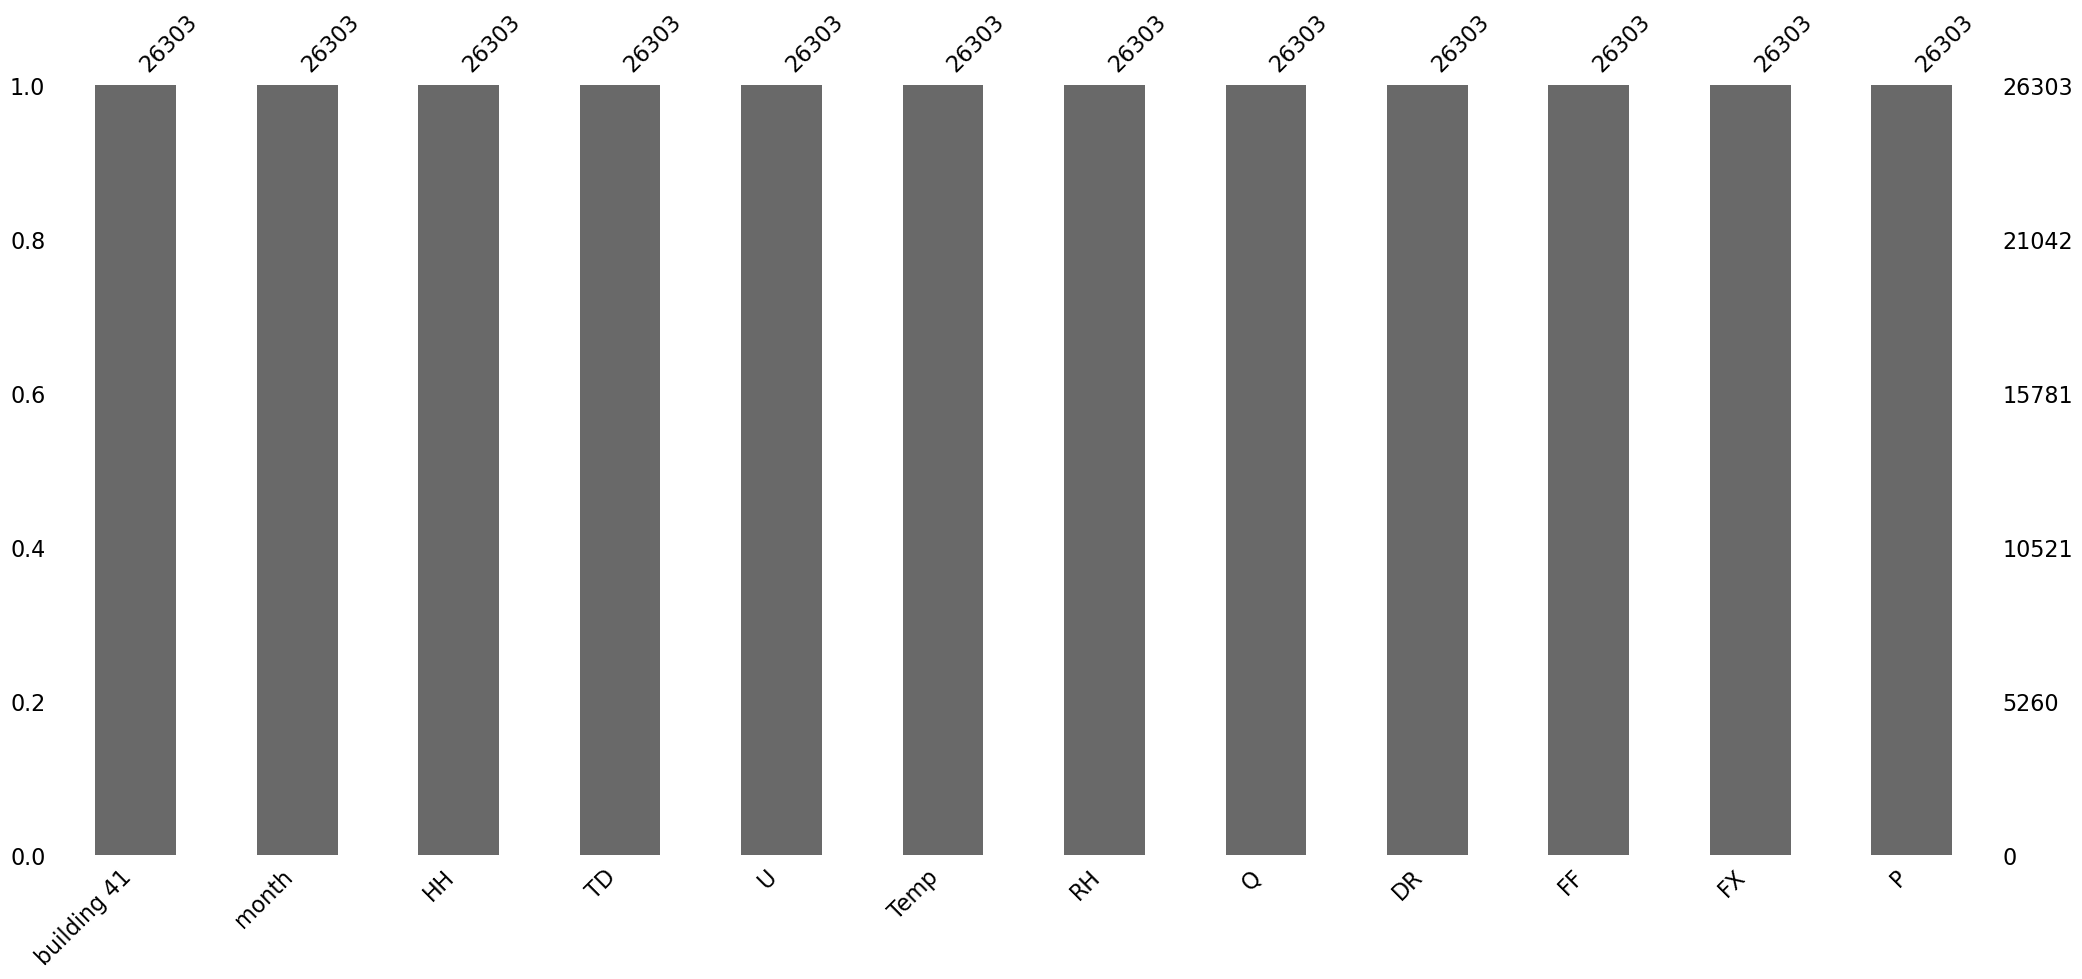

In [26]:
msno.bar(df)

<Axes: >

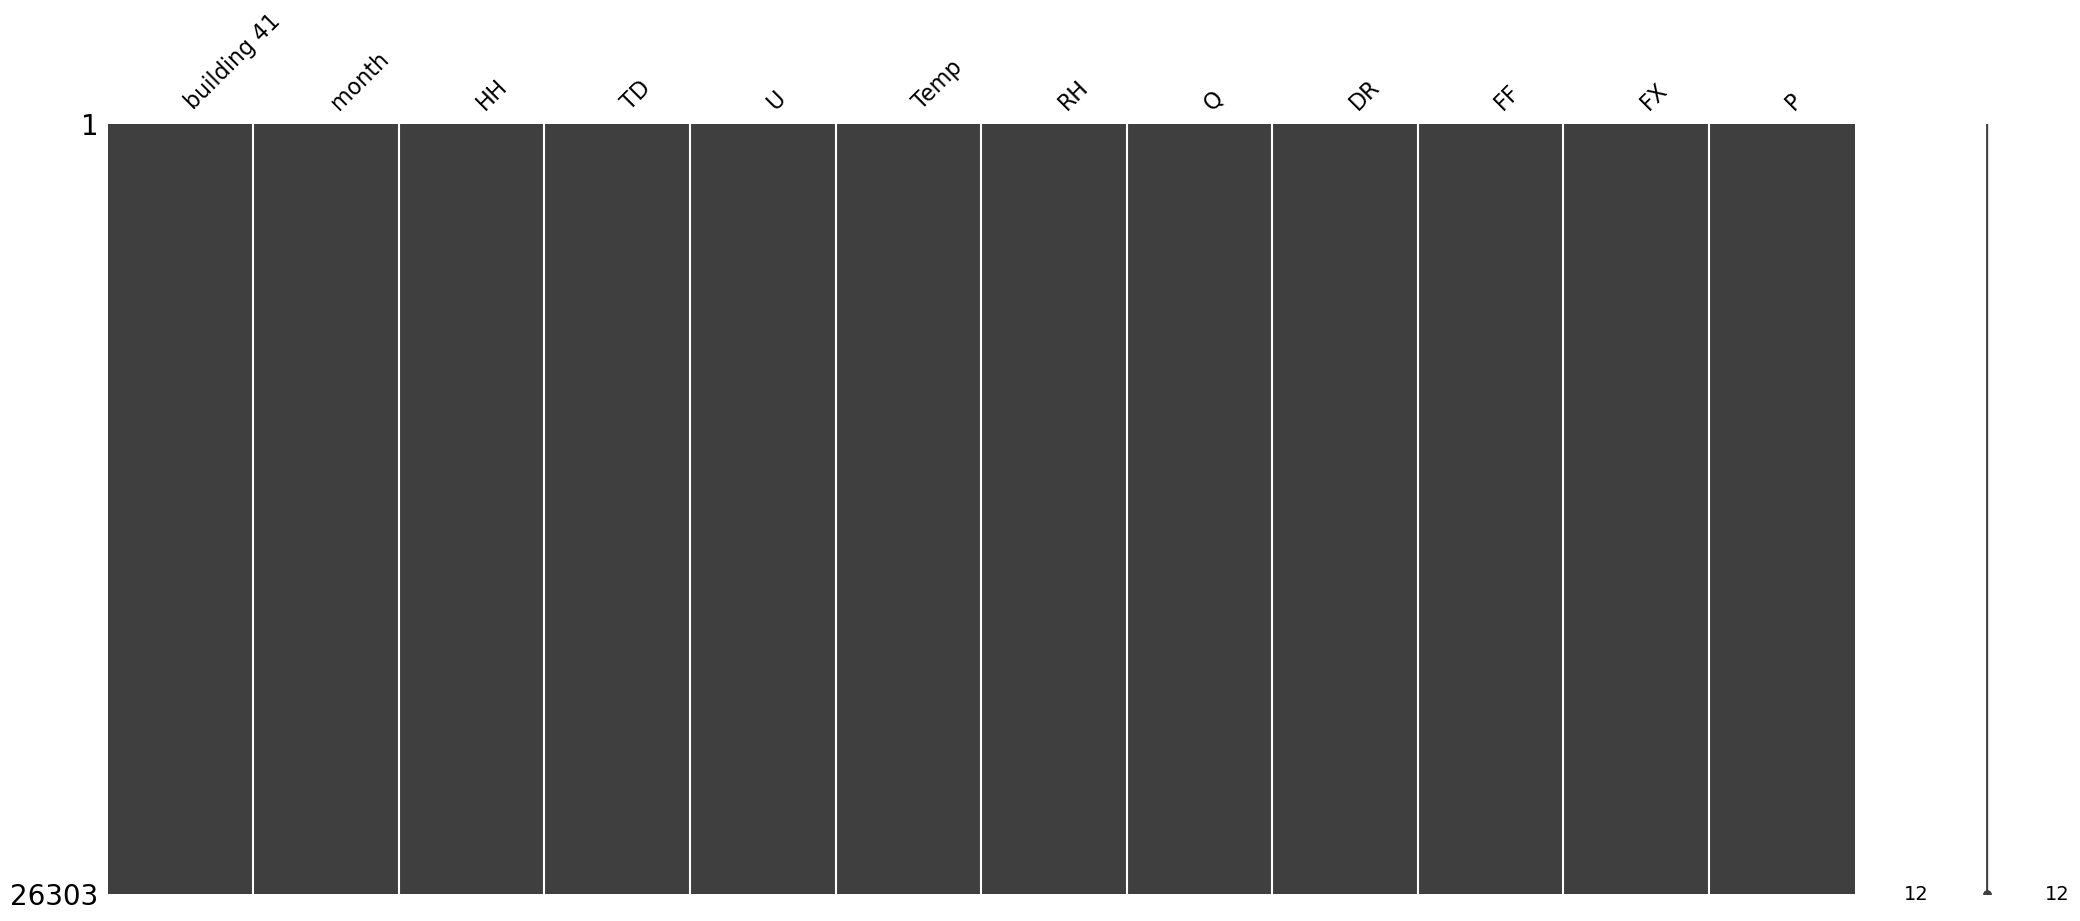

In [27]:
msno.matrix(df)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'building 41'),
  Text(1.5, 0, 'month'),
  Text(2.5, 0, 'HH'),
  Text(3.5, 0, 'TD'),
  Text(4.5, 0, 'U'),
  Text(5.5, 0, 'Temp'),
  Text(6.5, 0, 'RH'),
  Text(7.5, 0, 'Q'),
  Text(8.5, 0, 'DR'),
  Text(9.5, 0, 'FF'),
  Text(10.5, 0, 'FX'),
  Text(11.5, 0, 'P')])

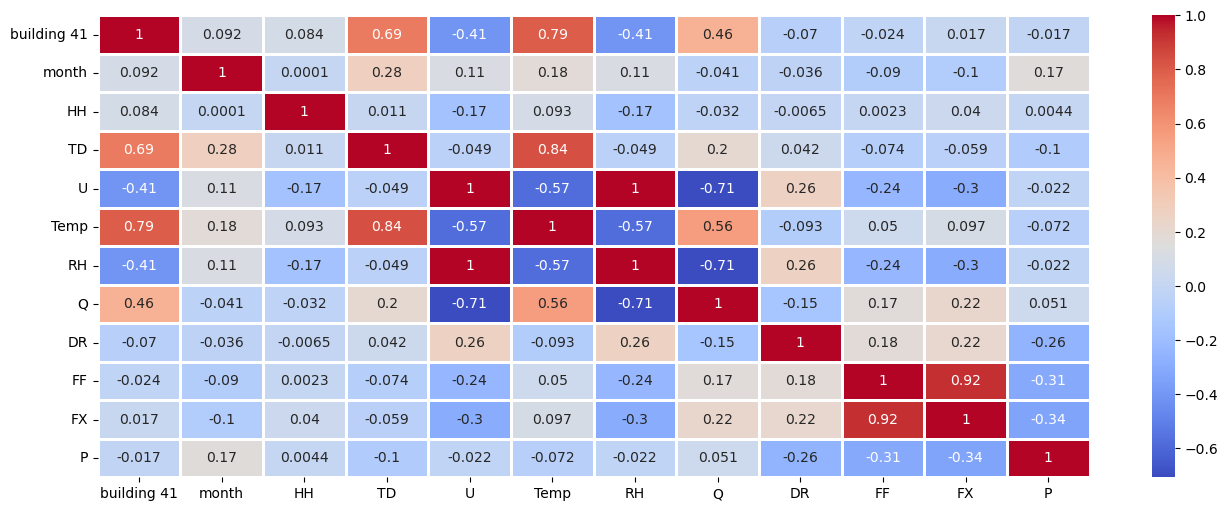

In [28]:
plt.figure(figsize = (16,6)) # Create matplotlib figure
sns.heatmap(df.corr(), annot = True, linewidths=1, fmt=".2g", cmap= 'coolwarm') 
# fmt = .1e (scientific notation), .2f (2 decimal places), .3g(3 significant figures), .2%(percentage with 2 decimal places)
plt.xticks(rotation='horizontal')

From the heatmap, we see temperature (Temp) correlates very positively with building electricity demand. Relative humidity (U) and hourly sum of precipitation (RH) are two highest negatively correlated features. in addition, both of these features are also multi-collinear. Which means, either of them can be utilized for predicting electricity demand.



# plot energy consumption data against U and Temp


In [29]:
# Resample the energy of the building over a week using the resmaple function and the mean  function. 

df_sum_weekly = df['building 41'].resample('W').mean()


In [30]:
df_sum_weekly

Time
2016-01-03    24.350363
2016-01-10    23.878540
2016-01-17    23.969647
2016-01-24    24.513488
2016-01-31    24.364913
                ...    
2018-12-09    23.188927
2018-12-16    20.797709
2018-12-23    20.231442
2018-12-30    18.501804
2019-01-06    21.291091
Freq: W-SUN, Name: building 41, Length: 158, dtype: float64

In [31]:
df_sum_weekly.shape

(158,)

<Axes: xlabel='Time'>

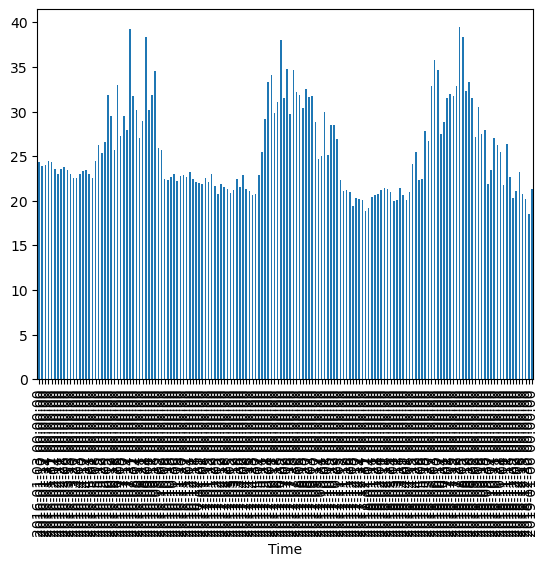

In [32]:
df_sum_weekly.plot(kind='bar')

In [33]:
# Resample the temperature over a week. 
df_feature1= df["Temp"].resample("W").mean()

In [34]:
df_feature1

Time
2016-01-03    6.391549
2016-01-10    6.095833
2016-01-17    3.155952
2016-01-24    0.982738
2016-01-31    8.437500
                ...   
2018-12-09    8.766667
2018-12-16    1.757143
2018-12-23    7.980952
2018-12-30    3.308333
2019-01-06    8.975000
Freq: W-SUN, Name: Temp, Length: 158, dtype: float64

<Axes: xlabel='Time'>

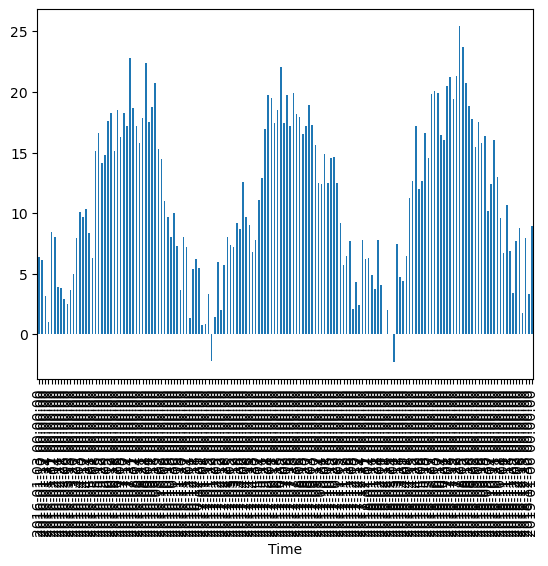

In [35]:
df_feature1.plot(kind='bar')

In [36]:
# Resample the relative humidity over a week. 
df_feature2 = df["U"].resample("W").mean()

In [37]:
df_feature2

Time
2016-01-03    88.422535
2016-01-10    86.958333
2016-01-17    87.839286
2016-01-24    86.839286
2016-01-31    82.958333
                ...    
2018-12-09    88.261905
2018-12-16    86.375000
2018-12-23    87.017857
2018-12-30    88.571429
2019-01-06    94.833333
Freq: W-SUN, Name: U, Length: 158, dtype: float64

<Axes: xlabel='Time'>

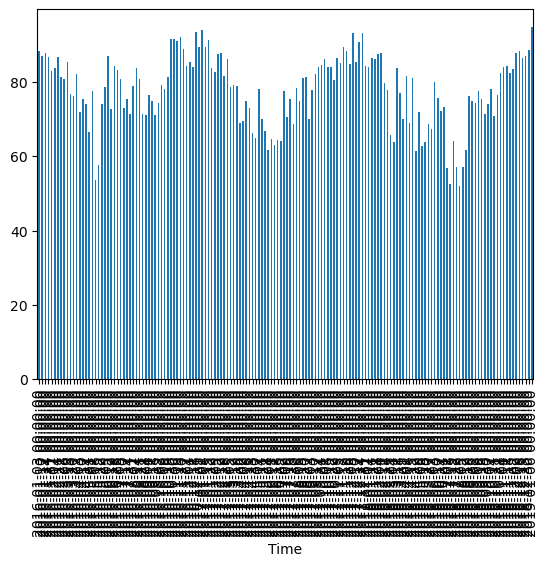

In [38]:
df_feature2.plot(kind='bar')

In [39]:
import warnings
warnings.filterwarnings('ignore')

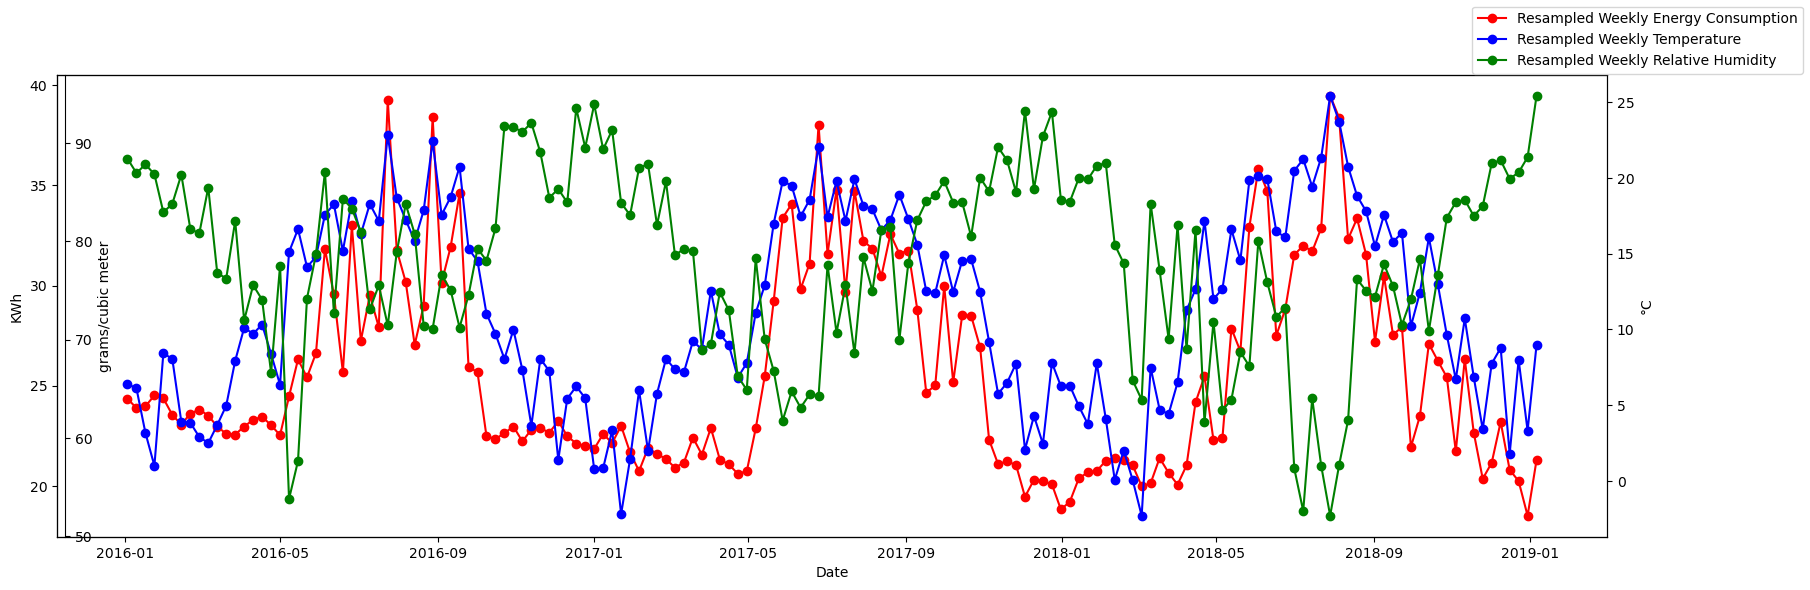

In [40]:
# plot the result
fig,ax = plt.subplots(figsize=(20,6))  # Create matplotlib figure
ax.plot(df_sum_weekly.index, df_sum_weekly, color="red",marker="o")
ax.set_ylabel("KWh")
ax.set_xlabel('Date')
ax2 = ax.twinx() #Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original one (i.e. at right).
ax3 = ax.twinx()
ax2.plot(df_sum_weekly.index, df_feature1, color="blue", marker="o")
ax2.set_ylabel("°C")
ax3.plot(df_sum_weekly.index, df_feature2, color="green", marker="o")
ax3.set_ylabel("grams/cubic meter")
ax3.spines["right"].set_position(("axes", .005))
fig.legend(["Resampled Weekly Energy Consumption","Resampled Weekly Temperature","Resampled Weekly Relative Humidity"], loc='upper right')
fig.show()


We see that energy demand of a building varies with temperature. Variations of the energy consumption across various seasons are also visible. Negative linear correlation of Relative Humidity can be explained. It is not just correlational with Energy consumption but also has high negative correlation (-0.57) with temperature. The correlations observed are well expected.

# Feature selection


We can now select features based on their strong coorealtion with the output and remove some input features which are strongly coorelated with each other to avoid the problem of multicolinearity. It is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.



### Exploring non-linear correlation between Energy with Hour and Month


We use spearman's correlation between two variables. The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. This one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.



In [41]:
# calculate the spearmans corelation between two variables
from scipy.stats import spearmanr

# filter columns form the datafarms
energy_x = np.array(df["building 41"])
hour = np.array(df["HH"])
month= np.array(df["month"])
# calculate spearman's correlation
corr1, _ = spearmanr(energy_x, hour)
corr2, _ = spearmanr(energy_x, month)
print('Spearmans correlation between Energy and hour feature: %.3f' % corr1)
print('Spearmans correlation between Energy and month feature: %.3f' % corr2)


Spearmans correlation between Energy and hour feature: 0.068
Spearmans correlation between Energy and month feature: 0.077


We see, the energy consumption has a seasonal effect which is reflected on the different months of the year. So, it has more correlation with month than hours of the day.

In [42]:
#Reduce number of features with lower correlation values or it has an inverse effect on the results of the model.
energy_xy = energy_y .loc[:, ~energy_y.columns.isin(["TD","U","DR","FX"])] # ~ sign drops the columns we select

In [43]:
energy_xy

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2016-01-01 01:00:00,1,1,6.6,0.82,0,30,10224
2016-01-01 02:00:00,1,2,7.0,0.83,0,40,10228
2016-01-01 03:00:00,1,3,5.9,0.91,0,30,10232
2016-01-01 04:00:00,1,4,4.2,0.96,0,20,10237
2016-01-01 05:00:00,1,5,4.0,0.98,0,20,10240
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,8.7,0.93,0,30,10341
2018-12-31 20:00:00,12,20,8.5,0.92,0,30,10338
2018-12-31 21:00:00,12,21,8.2,0.89,0,40,10336


# Now we develop a machine learning regression model based on the weather parameters to predict the energy consumption of the building.

Various forecasting techniques can be utilized with machine learning models. (Deng et al., 2018) tested the performance of various machine learning models on one of the largest database on buildings in CBECS, and found both Support Vector Machine (SVM) and Random Forest (RF) being able to handle the non-linear relationships better as they perform dynamic local investigations better rather than global optimization. Therefore, we are going to consider SVM and RF to develop the model.

In [44]:
y = energy_x

In [45]:
y

array([23.7832275, 23.7832275, 23.7832275, ..., 18.6027225, 18.1317675,
       18.6027225])

In [46]:
y.shape

(26303,)

In [47]:
x = energy_xy

In [48]:
x

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2016-01-01 01:00:00,1,1,6.6,0.82,0,30,10224
2016-01-01 02:00:00,1,2,7.0,0.83,0,40,10228
2016-01-01 03:00:00,1,3,5.9,0.91,0,30,10232
2016-01-01 04:00:00,1,4,4.2,0.96,0,20,10237
2016-01-01 05:00:00,1,5,4.0,0.98,0,20,10240
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,8.7,0.93,0,30,10341
2018-12-31 20:00:00,12,20,8.5,0.92,0,30,10338
2018-12-31 21:00:00,12,21,8.2,0.89,0,40,10336


In [49]:
x.shape

(26303, 7)

In [50]:
# #Splitting the data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [52]:
X_train

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2016-11-29 03:00:00,11,3,-4.6,0.91,0,20,10343
2018-01-29 11:00:00,1,11,10.7,0.72,14,80,10259
2018-07-03 20:00:00,7,20,23.5,0.49,11,40,10151
2017-09-05 16:00:00,9,16,23.1,0.70,56,40,10145
2017-03-08 06:00:00,3,6,5.1,0.83,0,40,10169
...,...,...,...,...,...,...,...
2017-06-30 20:00:00,6,20,17.5,0.75,4,20,10057
2018-03-29 17:00:00,3,17,9.9,0.50,60,30,10047
2017-02-14 06:00:00,2,6,0.2,0.76,0,30,10268


In [53]:
X_test

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2017-09-17 04:00:00,9,4,6.0,0.98,0,10,10121
2016-05-27 12:00:00,5,12,19.7,0.70,272,40,10157
2018-04-18 06:00:00,4,6,10.1,0.87,29,10,10306
2018-10-29 02:00:00,10,2,3.4,0.78,0,70,10113
2017-05-30 03:00:00,5,3,18.0,0.88,0,20,10127
...,...,...,...,...,...,...,...
2018-06-30 22:00:00,6,22,21.7,0.35,0,60,10146
2018-09-05 10:00:00,9,10,20.4,0.84,57,30,10178
2016-09-25 02:00:00,9,2,13.7,0.70,0,30,10173


In [54]:
y_train

array([22.3703625, 24.7251375, 36.0280575, ..., 21.192975 , 19.5446325,
       20.72202  ])

In [55]:
y_test

array([19.5446325, 32.2604175, 20.0155875, ..., 20.72202  , 28.4927775,
       25.1960925])

In [56]:
X_train.shape


(21042, 7)

In [57]:
X_test.shape

(5261, 7)

In [58]:
y_train.shape

(21042,)

In [59]:
y_test.shape

(5261,)

In [60]:
y_train = y_train.ravel()


In [61]:
y_train

array([22.3703625, 24.7251375, 36.0280575, ..., 21.192975 , 19.5446325,
       20.72202  ])

In [62]:
y_test = y_test.ravel()

In [63]:
y_test

array([19.5446325, 32.2604175, 20.0155875, ..., 20.72202  , 28.4927775,
       25.1960925])

In [64]:
# importing regression model 
from sklearn.svm import SVR


In [65]:
#Creating an instance or object of the support vector machine regressor class
SVReg = SVR(kernel= 'rbf') # It must be one of 'linear', 'poly', 'rbf', 'sigmoid' (rbf - Radial Basis Function is used in machine learning to find a non-linear regression line.)

# fitting the regression model to the training dataset
SVReg.fit(X_train, y_train) #Fit the SVM model according to the given training data.

SVR()

In [66]:
# predicting on the training data
Predicted_Train= SVReg.predict(X_train)
Predicted_Train
     

array([23.33747534, 23.52037698, 23.57941113, ..., 23.3715236 ,
       23.38476265, 23.42220531])

In [67]:
# To evaluate the performance of the model, importing error metrics function
from sklearn.metrics import r2_score #(coefficient of determination) regression score function.
from sklearn.metrics import mean_squared_error #The MSE indicates the average distance of the best fit regression line to the observed values.

print(r2_score(y_train,Predicted_Train))
print(mean_squared_error(y_train,Predicted_Train))

0.01964854734223298
39.16973198670731


# Scaling to improve the model performance

Scaling is used to bring all features to the same level of magnitudes. Without scaling, the features with high magnitudes will have more weight in the ‘best fit’ calculation, which tries to minimize the distance between the fit line and the observed values 

In [68]:
# Import the required packages
from sklearn.preprocessing import StandardScaler #standardizes the data to a range in which the mean is equal to 0 and the standard deviation is 1. It assumes the data is normally distributed.
from sklearn.preprocessing import MinMaxScaler #normalizes the data and brings the values between 0 (lowest value) and 1 (highest value)
from sklearn.preprocessing import RobustScaler #standardizes the data. But is more robust to outliers because it only scales the data according to the Interquartile Range (IQR) between the 1st and 3rd quartile.


In [69]:
#Generate the scaler
sc1= StandardScaler()
sc2= MinMaxScaler()
sc3= RobustScaler()

In [70]:
#Scaling the input data
X1 = sc1.fit_transform(x)
X2 = sc2.fit_transform(x)
X3 = sc3.fit_transform(x)
#We do not need to scale the output data as we have only one output.

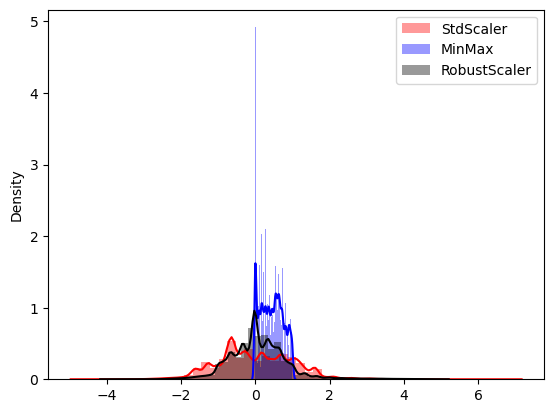

In [71]:
#plotting to visually explore the scaled features
sns.distplot(X1,color="red",label="StdScaler")
sns.distplot(X2,color="blue",label="MinMax")
sns.distplot(X3,color="black",label="RobustScaler")
plt.legend()

In [72]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train = y_train.ravel()
y_test = y_test = y_test.ravel()

In [73]:
#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)
regr

SVR()

In [74]:
# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

In [75]:
#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8676607662388549
5.287585695616702


In [76]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.8650113986197081
5.364047670294077


In [77]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train = y_train.ravel()
y_test = y_test = y_test.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))
     

0.8543589078950262
5.81905859224003


In [78]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.8514063183174979
5.904673312407655


In [79]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.ravel()
y_test = y_test.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))


0.861376711378752
5.538663759501534


In [80]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.8581322813412404
5.637403439847457


We observe that, when the R2 value increases and RMS error decreases from the previous model, we get a better performing model. Therefore, Standard scaler is the best fit for our model which can explain 86.78% of the variance of the training dataset and 86.52% of the variance of the test dataset. The prediction accuracy will vary +-2.3 (root mean squared error of 5.5).

# Same way we can compare between different karnels

In [81]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.ravel()
y_test = y_test.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='poly', degree=5) # y = ax5 + bx4 + cx3 + dx2 + ex + f

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.6243431637453998
15.009288306939203


Only parameter U is left out of the regression model, as U and RH (Hourly Sum of Precipitation) have a correlation of 100%. As a result, including only one of the two parameters in the model is sufficient.

In [82]:
X4 = sc1.fit_transform(energy_y.loc[:, ~energy_y.columns.isin(["U"])])

In [83]:
X4

array([[-1.601129  , -1.6613172 , -0.56409276, ..., -0.28605295,
         0.22155581,  0.65669612],
       [-1.601129  , -1.51684934, -0.47940344, ...,  0.19367485,
         0.51987076,  0.69859933],
       [-1.601129  , -1.37238148, -0.42858984, ..., -0.28605295,
         0.51987076,  0.74050253],
       ...,
       [ 1.58830877,  1.22803995, -0.08983256, ...,  0.19367485,
        -0.07675914,  1.82998591],
       [ 1.58830877,  1.37250781, -0.05595684, ...,  0.19367485,
         0.22155581,  1.78808271],
       [ 1.58830877,  1.51697567, -0.0728947 , ...,  0.19367485,
        -0.07675914,  1.79855851]])

In [84]:
#We redefine the data for standard scaling and split into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.ravel()
y_test = y_test.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8692363907335192
5.2246319569341315


In [85]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.865643553596894
5.338927701659935


We see the improvement of the prediction accuracy. A model in which all weather variables are taken into account returns the best results, despite the low correlation between the added parameters with the energy demand.

Text(0, 0.5, 'kWh')

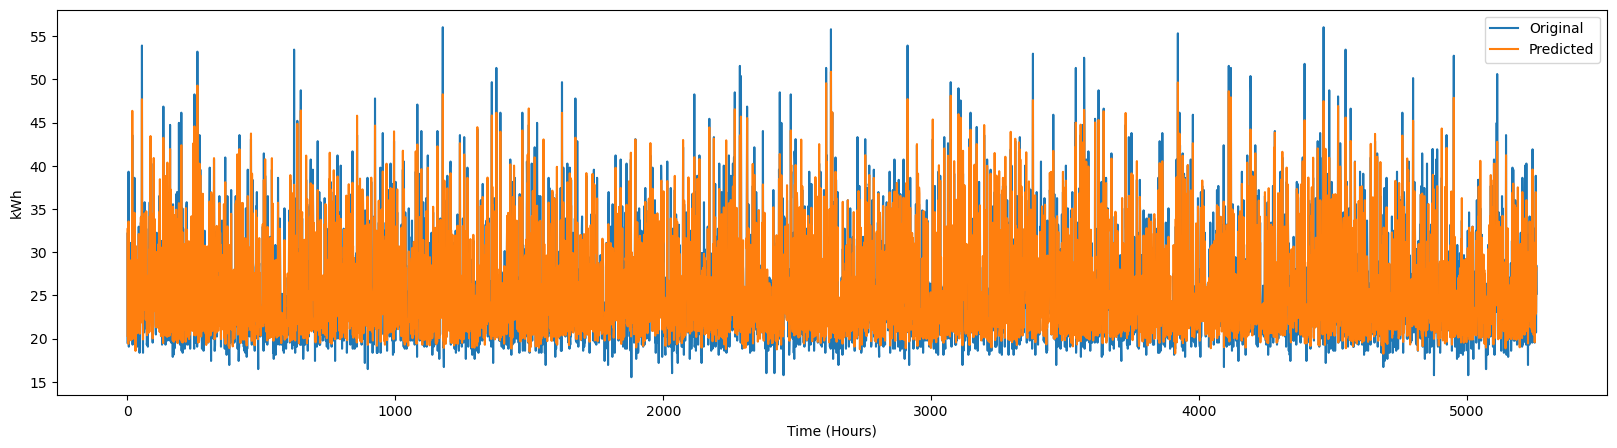

In [86]:
plt.figure(figsize = (20,5))
plt.plot(y_test, label="Original")
plt.plot(pred, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
     

Now we can further improve the perofrmance of the model by finding suitable hyperparameters (epsilon, C and gamma). We utilize gridsearch library for exhaustive search over specified parameter values for an estimator. Default settings for C, Epsilon and Gamma are 1, 0.1 and ’scale’. With best parameters, we can check the improved performance of the model.

### settings for hyperparameters

In [87]:
#settings for hyperparameters
from sklearn.model_selection import GridSearchCV

In [88]:
check_parameters = {'C':[10,20,30], 'epsilon':[0.03, 0.5, 1], 'gamma':[5,6,7]}

In [90]:
# gridsearchcv = GridSearchCV(regr, check_parameters, n_jobs=-1, cv=3)
# gridsearchcv.fit(X_train, y_train)

In [91]:
# print('Best parameters found:\n', gridsearchcv.best_params_)

In [93]:
# Best parameters found:{'C': 30, 'epsilon': 0.03, 'gamma': 5}

In [94]:
# We find best_svr result: C=30, epsilon=0.03, gamma=5. Considering these parameters, the model becomes as following:
Regr = SVR(kernel= 'rbf', C=30, epsilon = 0.03, gamma = 5) 

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8692363907335192
5.2246319569341315


In [95]:
Regr = SVR(kernel= 'rbf', C=40, epsilon = 0.03, gamma = 5) 

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8692363907335192
5.2246319569341315


We see the adjusted hyper aprameter performs better than the default settings.

### Check the RF regressor model performance

In [96]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

In [97]:
# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=10, random_state=0)

In [99]:
# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.ravel()
y_test2 = y_test2.ravel()

In [100]:
RFReg.fit(X_train2, y_train2)


RandomForestRegressor(max_depth=10, random_state=0)

In [101]:
#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

In [102]:
#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))

0.9160860073645251
3.3527655745857405


In [103]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

In [104]:
# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=10, random_state=0)


In [105]:
# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X4, y, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.ravel()
y_test2 = y_test2.ravel()

In [106]:
RFReg.fit(X_train2, y_train2)

RandomForestRegressor(max_depth=10, random_state=0)

In [107]:
#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

In [108]:
#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))

0.916772327031522
3.325343819519643


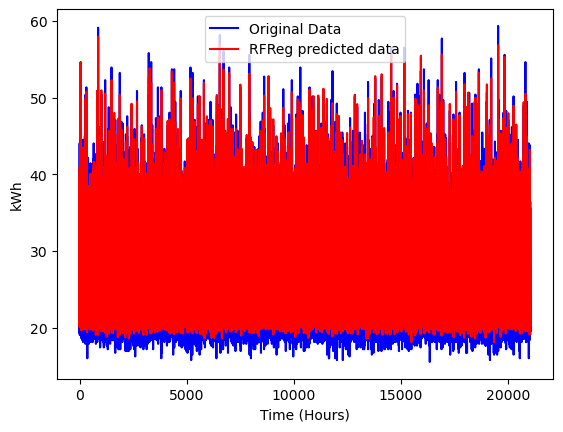

In [112]:
# Lets visualise our fit to the training data.
plt.plot(y_train2, color="b",label= 'Original Data')
plt.plot(Predicted_Train2, color ="red", label="RFReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.show()

In [113]:
#Predicting on the test set (X_test)
Predicted_Test2 = RFReg.predict(X_test2)

#Caculating R2 score and Root mean square error
print(r2_score(y_test2,Predicted_Test2))
print(mean_squared_error(y_test2,Predicted_Test2))

0.883404937167962
4.633142863596595


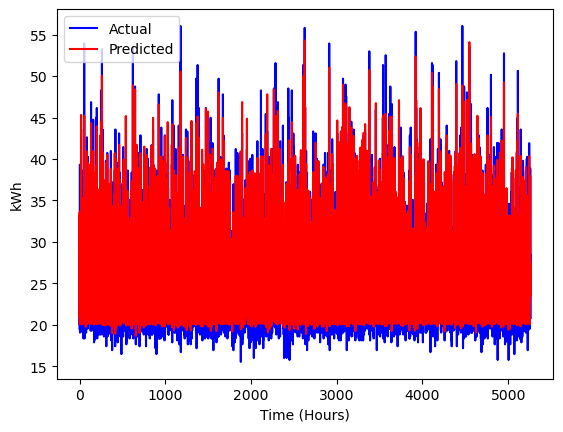

In [114]:
# Lets visualise our fit to the test data.
plt.plot(y_test2, color='blue', label="Actual")
plt.plot(Predicted_Test2, color='Red', label="Predicted")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
#settings for hyperparameters
check_parameters = {'max_depth':[8,9,11,12]}

In [117]:
# gridsearchcv = GridSearchCV(RFReg, check_parameters, n_jobs=-1, cv=3)
# gridsearchcv.fit(X_train, y_train)

In [118]:
# print('Best parameters found:\n', gridsearchcv.best_params_)

In [119]:
# Best parameters found:{'max_depth': 12}

In [126]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=12, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X4, y, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.ravel()
y_test2 = y_test2.ravel()


RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))

0.9413680428300156
2.3426272710447176


In [127]:

#Predicting on the test set (X_test)
Predicted_Test2 = RFReg.predict(X_test2)

#Caculating R2 score and Root mean square error
print(r2_score(y_test2,Predicted_Test2))
print(mean_squared_error(y_test2,Predicted_Test2))

0.8914761615776285
4.312416283363921


In [129]:
#settings for hyperparameters
# check_parameters = {'max_depth':[15,20,30]}

# gridsearchcv = GridSearchCV(RFReg, check_parameters, n_jobs=-1, cv=10)
# gridsearchcv.fit(X_train, y_train)

# print('Best parameters found:\n', gridsearchcv.best_params_)

# Best parameters found:{'max_depth': 30}

In [149]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg_x = RandomForestRegressor(max_depth=30, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X4, y, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.ravel()
y_test2 = y_test2.ravel()


RFReg_x.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg_x.predict(X_train2)

#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))
     

0.9871735597631518
0.5124776681452499


In [150]:
#Predicting on the test set (X_test)
Predicted_Test2 = RFReg_x.predict(X_test2)

#Caculating R2 score and Root mean square error
print(r2_score(y_test2,Predicted_Test2))
print(mean_squared_error(y_test2,Predicted_Test2))

0.9059580709782538
3.736948046879361


### Allocate budget using predictive modeling

With the help of energy price and predicted demand, we can calculate the estimated cost of energy for the month of January. Now we have a trained model.

In [133]:
# Import the weather cost file

weather_cost = pd.read_excel('Weather_Cost.xlsx')

In [134]:
weather_cost

,Time,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
0,2019-01-01 00:00:00,1,1,68,96,73,1,0,6,40,90,10323
1,2019-01-01 01:00:00,1,2,65,94,74,-1,0,0,40,70,10320
2,2019-01-01 02:00:00,1,3,63,93,73,0,0,0,40,70,10314
3,2019-01-01 03:00:00,1,4,61,92,73,0,0,0,50,60,10308
4,2019-01-01 04:00:00,1,5,58,92,69,0,0,0,50,70,10299
...,...,...,...,...,...,...,...,...,...,...,...,...
739,2019-01-31 19:00:00,1,20,-24,93,-15,0,0,0,30,60,9929
740,2019-01-31 20:00:00,1,21,-22,95,-15,0,0,0,30,60,9920
741,2019-01-31 21:00:00,1,22,-24,91,-11,0,0,0,40,70,9911
742,2019-01-31 22:00:00,1,23,-25,87,-6,0,0,0,50,80,9900


In [142]:
# Make time column as index
weather_cost = weather_cost.set_index('Time')

In [143]:
#check missing value
weather_cost.isna().sum()

month    0
HH       0
TD       0
U        0
Temp     0
RH       0
Q        0
DR       0
FF       0
FX       0
P        0
dtype: int64

In [144]:
#remove relative humidity column from the data set
weather_cost_updated= weather_cost.loc[:, ~weather_cost.columns.isin(['U'])]

In [145]:
 weather_cost_updated

,month,HH,TD,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,
2019-01-01 00:00:00,1,1,68,73,1,0,6,40,90,10323
2019-01-01 01:00:00,1,2,65,74,-1,0,0,40,70,10320
2019-01-01 02:00:00,1,3,63,73,0,0,0,40,70,10314
2019-01-01 03:00:00,1,4,61,73,0,0,0,50,60,10308
2019-01-01 04:00:00,1,5,58,69,0,0,0,50,70,10299
...,...,...,...,...,...,...,...,...,...,...
2019-01-31 19:00:00,1,20,-24,-15,0,0,0,30,60,9929
2019-01-31 20:00:00,1,21,-22,-15,0,0,0,30,60,9920
2019-01-31 21:00:00,1,22,-24,-11,0,0,0,40,70,9911


In [146]:
#scale the input data
X5 = sc1.transform(weather_cost_updated)

In [153]:
#predict the consumption
predicted = RFReg_x.predict(X5)
predicted.shape
     

(744,)

In [154]:
#Converting the predicted array into a dataframe so it is easier when plotting to show the time index
predicted= pd.DataFrame(predicted, columns=['kWh'])


In [155]:
predicted

,kWh
0,45.623766
1,45.343547
2,45.374159
3,45.506027
4,45.400062
...,...
739,22.660000
740,22.629388
741,22.605840
742,22.563454


In [156]:
#Import the index from the weather cost file
predicted['Time']= weather_cost.index
predicted

,kWh,Time
0,45.623766,2019-01-01 00:00:00
1,45.343547,2019-01-01 01:00:00
2,45.374159,2019-01-01 02:00:00
3,45.506027,2019-01-01 03:00:00
4,45.400062,2019-01-01 04:00:00
...,...,...
739,22.660000,2019-01-31 19:00:00
740,22.629388,2019-01-31 20:00:00
741,22.605840,2019-01-31 21:00:00
742,22.563454,2019-01-31 22:00:00


In [157]:
#Set the time column as index
predicted= predicted.set_index('Time')
predicted

,kWh
Time,
2019-01-01 00:00:00,45.623766
2019-01-01 01:00:00,45.343547
2019-01-01 02:00:00,45.374159
2019-01-01 03:00:00,45.506027
2019-01-01 04:00:00,45.400062
...,...
2019-01-31 19:00:00,22.660000
2019-01-31 20:00:00,22.629388
2019-01-31 21:00:00,22.605840


Text(0.5, 0, 'Time')

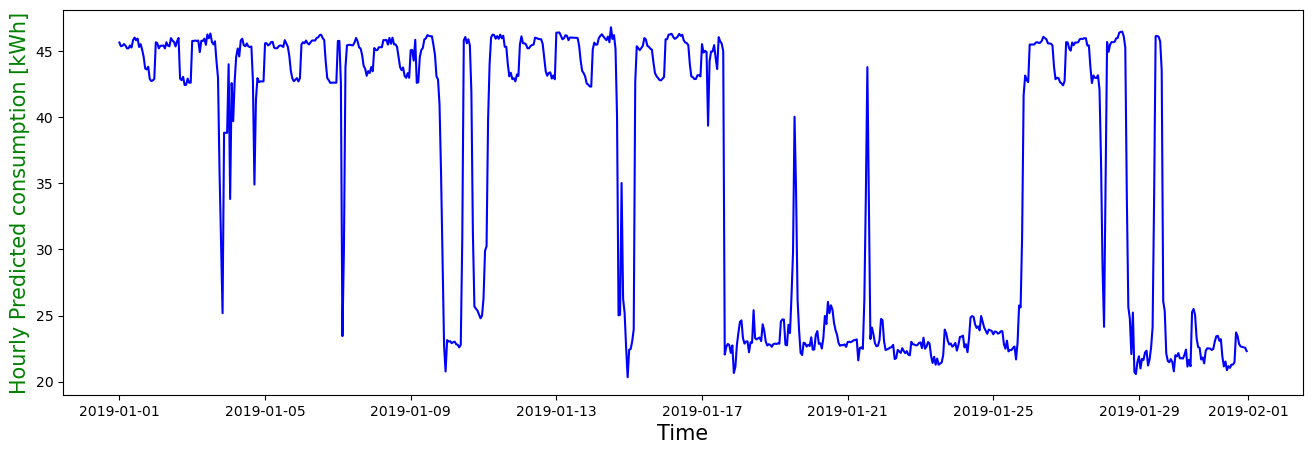

In [158]:

#Plot the hourly forecast consumption in kWh 
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(predicted,  label='Hourly Predicted consumption',color = 'blue')
ax.set_ylabel('Hourly Predicted consumption [kWh]',size=15, color='green')
ax.set_xlabel('Time',size=15)

# Plot the hourly forecast consumption in kWh and calculated price for the whole month

In [159]:

#Calculating the hourly consumtion cost.
Hourly_Cost= predicted*0.23
Hourly_Cost

,kWh
Time,
2019-01-01 00:00:00,10.493466
2019-01-01 01:00:00,10.429016
2019-01-01 02:00:00,10.436057
2019-01-01 03:00:00,10.466386
2019-01-01 04:00:00,10.442014
...,...
2019-01-31 19:00:00,5.211800
2019-01-31 20:00:00,5.204759
2019-01-31 21:00:00,5.199343


In [160]:
#Resampling the hourly consumption charges into daily by using the resample function and sum
Daily_Cost = Hourly_Cost.resample("D").sum()

print("total cost", Daily_Cost.sum())

total cost kWh    6120.192351
dtype: float64


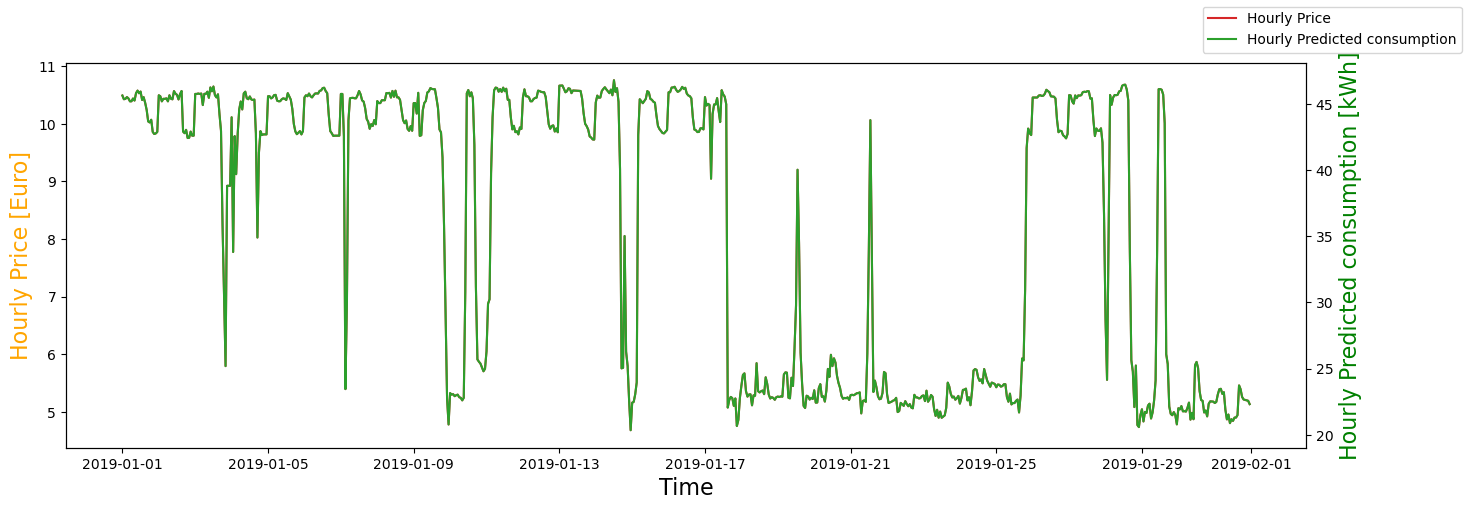

In [161]:
fig, ax = plt.subplots(figsize = (16,5))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.plot(Hourly_Cost,  label='Hourly Price',color = 'tab:red')
ax2.plot(predicted,  label='Hourly Predicted consumption',color = 'tab:green')
ax.set_ylabel('Hourly Price [Euro]', size=16, color='orange')
ax2.set_ylabel('Hourly Predicted consumption [kWh]',size=16, color='green')
ax.set_xlabel('Time',size=16,)
fig.legend()

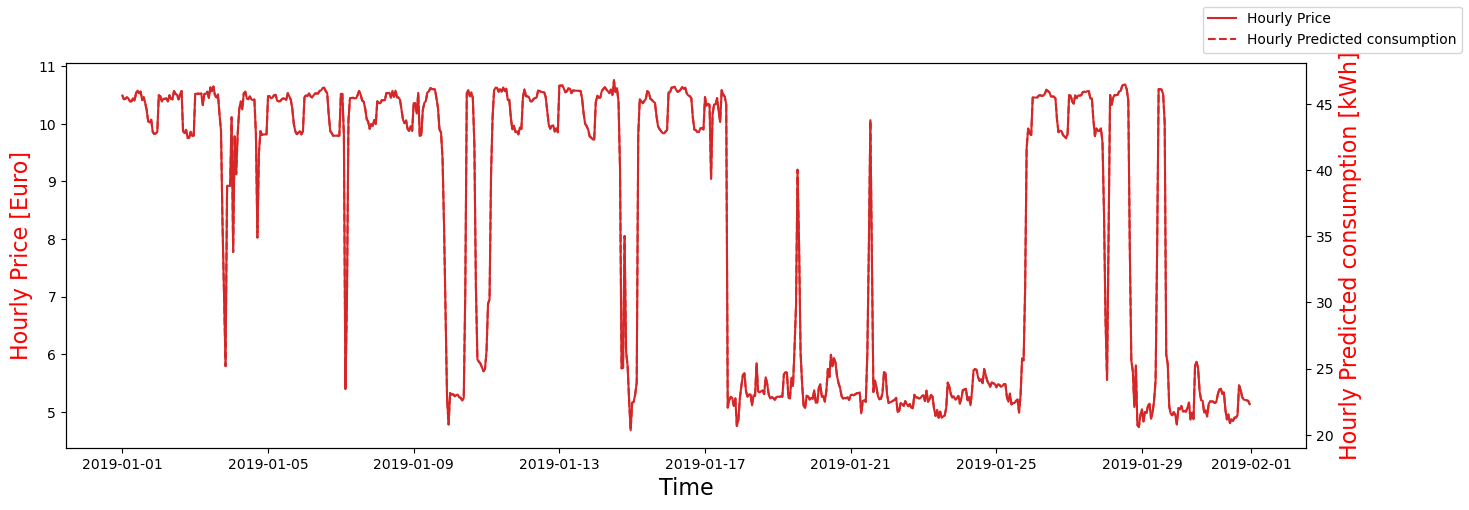

In [166]:
fig, ax = plt.subplots(figsize = (16,5))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.plot(Hourly_Cost,  label='Hourly Price',color = 'tab:red')
ax2.plot(predicted,  label='Hourly Predicted consumption',color = 'tab:red', linestyle='dashed')
ax.set_ylabel('Hourly Price [Euro]', size=16, color='red')
ax2.set_ylabel('Hourly Predicted consumption [kWh]',size=16, color='red')
ax.set_xlabel('Time',size=16)
fig.legend()

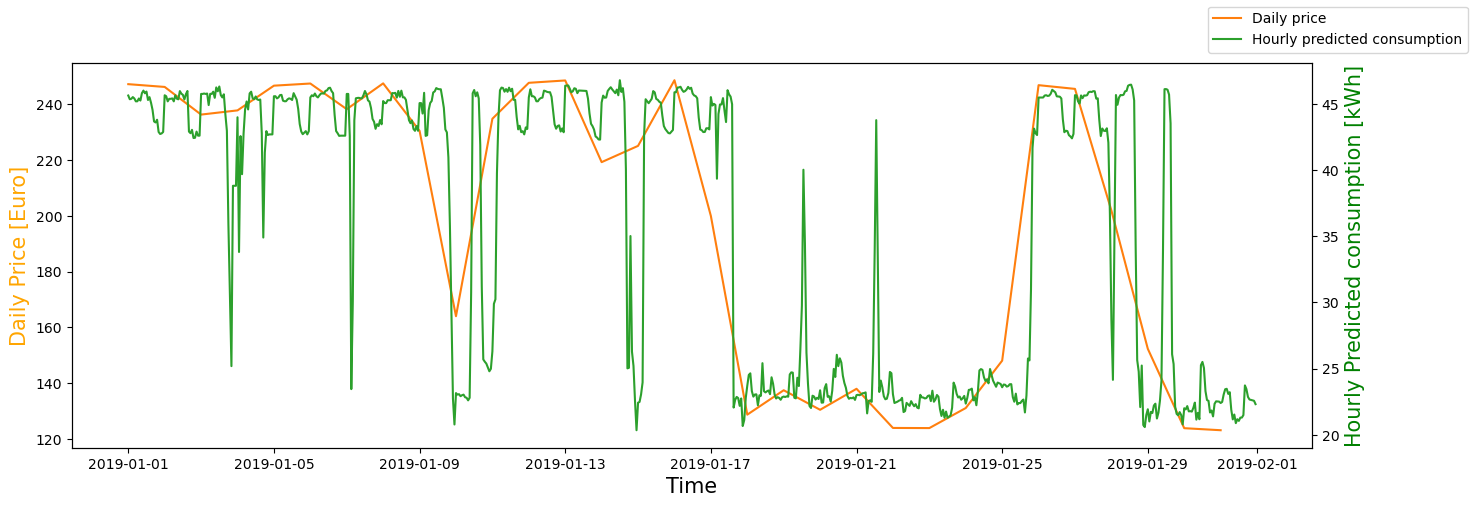

In [167]:

fig, ax = plt.subplots(figsize=(16,5))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.plot(Daily_Cost, label= 'Daily price', color = 'tab:orange')
ax2.plot(predicted, label='Hourly predicted consumption', color = 'tab:green')
ax.set_ylabel('Daily Price [Euro]', size=15, color='orange')
ax2.set_ylabel('Hourly Predicted consumption [kWh]',size=15, color='green')
ax.set_xlabel('Time',size=15)
fig.legend()

# Set a visual threshold in the forecast when the model predicts higher than a budget limit

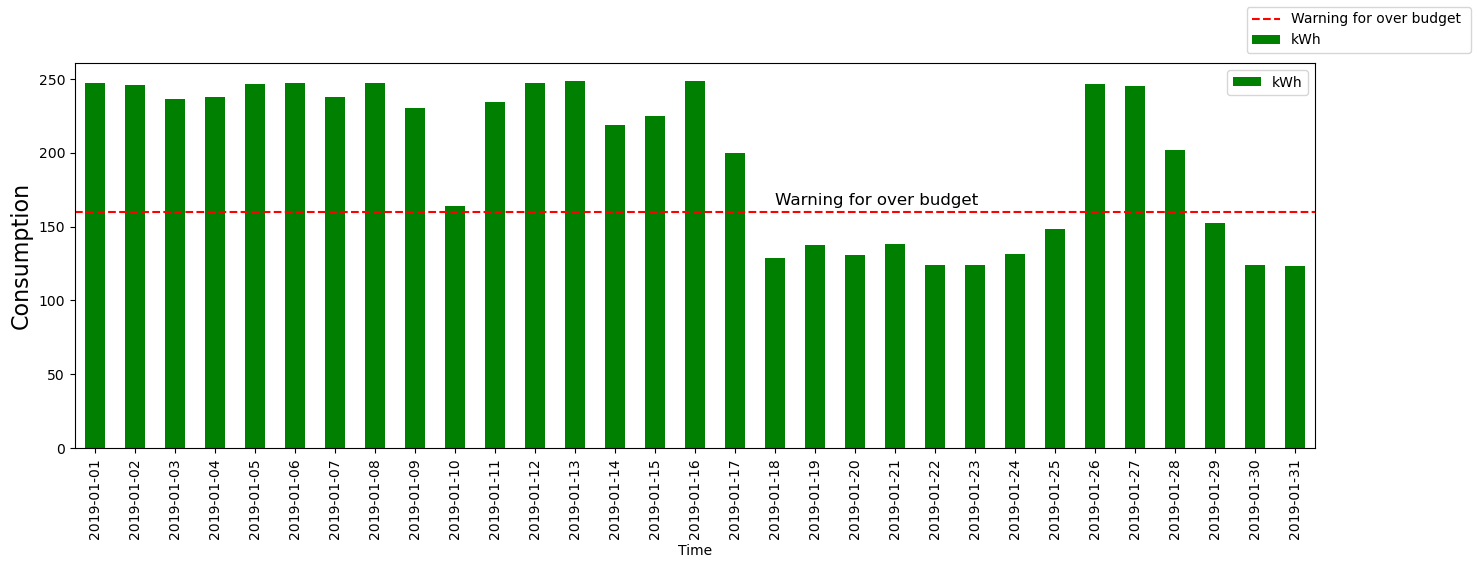

In [168]:
fig = plt.figure(figsize = (16,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
Daily_Cost.plot(kind='bar', ax=ax, rot=0,color='green')
ax.axhline(y=160, color='red', linestyle='--', label="Warning for over budget ")
plt.text(17, 165, 'Warning for over budget', fontsize=12)

ax.set_ylabel('Consumption', size=16, color='black')
plt.xticks(rotation='vertical')
ax.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in Daily_Cost.index])
fig.legend()

The maximum daily allocated budget for the building is 160 euros. A visual threshold is set for when the model predicts a cost which is higher than the maximum budget. A bar graph is used to identify if the daily consumption exceeds the budget. As can be seen, the daily cost of energy continuously exceeds the set budget of 160 euros.